In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.patches as mpatches

In [213]:
#import the data from a csv-file
df_zip_suitable = pd.read_csv('data/suitable.csv')
print(df_zip_suitable.info())
df_sales = pd.read_csv('data/sales.csv')
print(df_sales.info())
df_zip_center = pd.read_csv('data/city_center.csv')
print(df_zip_center.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   zipcode  86 non-null     int64
dtypes: int64(1)
memory usage: 820.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   condition      21597 non-null  int64  
 7   grade          21597 non-null  int64  
 8   sqft_above     21597 non-null  float64
 9   sqft_basement  8318 non-null   float64
 10  yr_built       21597 non-null  int64  
 11  zipcode        21597 non-null  int64  
 12  lat         

In [236]:
# reduce dataframe to top 10% neighborhoods in city center
df_selling10101010101010 = df_sales[df_sales.zipcode.isin(df_zip_center.zipcode)]
#print(df_selling10.info())
df_selling10 = df_selling[df_selling.price > df_selling.price.quantile(0.9)]
#print(df_selling10.info())

# reduce dataframe to neighborhoods in outskirts
df_buying = df_sales[df_sales.zipcode.isin(df_zip_suitable.zipcode)]
#print(df_buying.info())

# identifiers for average houses: sqft_above(700-2700), sqft_lot(500-1300),
# sqft_lot15(500-1300), sqft_living(>1000), floors(<3), bathrooms(>1),
# bedrooms(>1), condition(>2), grade(>6)
avg_house_dict = {}
# avg_house_dict['sqft_above'] = [700, 2700]
# avg_house_dict['sqft_lot'] = [3000, 13000]
# avg_house_dict['sqft_lot15'] = [3000, 13000]
# avg_house_dict['sqft_living'] = [1000, 99999999]
# avg_house_dict['floors'] = [0, 3]
# avg_house_dict['bathrooms'] = [1, 100]
# avg_house_dict['bedrooms'] = [1, 100]
# avg_house_dict['condition'] = [3, 100]
# avg_house_dict['grade'] = [6, 100]
# avg_house_dict['price'] = [200000, 900000]
avg_house_dict['sqft_above'] = [1000, 2000]
avg_house_dict['sqft_lot'] = [5000, 10000]
avg_house_dict['sqft_lot15'] = [5000, 10000]
avg_house_dict['sqft_living'] = [1000, 99999999]
avg_house_dict['floors'] = [0, 3]
avg_house_dict['bathrooms'] = [1, 100]
avg_house_dict['bedrooms'] = [1, 100]
avg_house_dict['condition'] = [3, 100]
avg_house_dict['grade'] = [7, 10]
avg_house_dict['price'] = [400000, 800000]
df_buying_avg = df_buying.copy()
print(df_buying_avg.info())
for i in avg_house_dict:
    print('--->', i)
    df_buying_avg = df_buying_avg[df_buying_avg[i] > avg_house_dict[i][0]]
    df_buying_avg = df_buying_avg[df_buying_avg[i] < avg_house_dict[i][1]]
print(df_buying_avg.info())



<class 'pandas.core.frame.DataFrame'>
Index: 3987 entries, 2 to 21587
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       3987 non-null   int64  
 1   bedrooms       3987 non-null   float64
 2   bathrooms      3987 non-null   float64
 3   sqft_living    3987 non-null   float64
 4   sqft_lot       3987 non-null   float64
 5   floors         3987 non-null   float64
 6   condition      3987 non-null   int64  
 7   grade          3987 non-null   int64  
 8   sqft_above     3987 non-null   float64
 9   sqft_basement  1503 non-null   float64
 10  yr_built       3987 non-null   int64  
 11  zipcode        3987 non-null   int64  
 12  lat            3987 non-null   float64
 13  long           3987 non-null   float64
 14  sqft_living15  3987 non-null   float64
 15  sqft_lot15     3987 non-null   float64
 16  price          3987 non-null   float64
 17  date           3987 non-null   object 
 18  sales_year  

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52  1  2  3  4  5  6  7  8  9 10 11 12 13
 14 15 16 17]


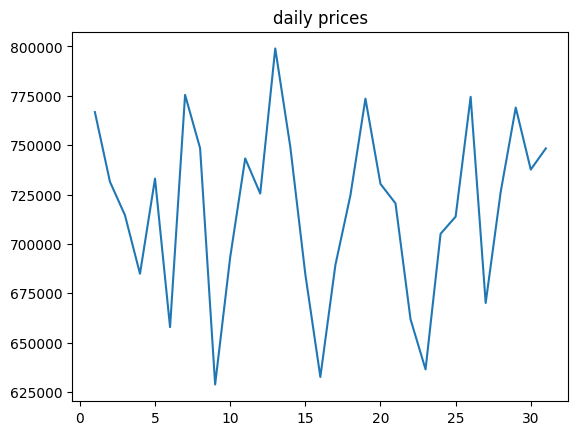

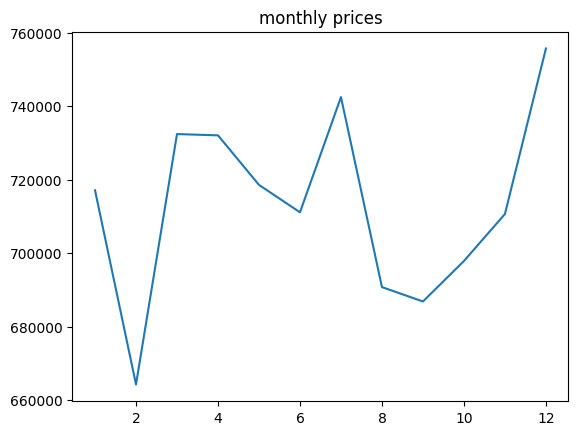

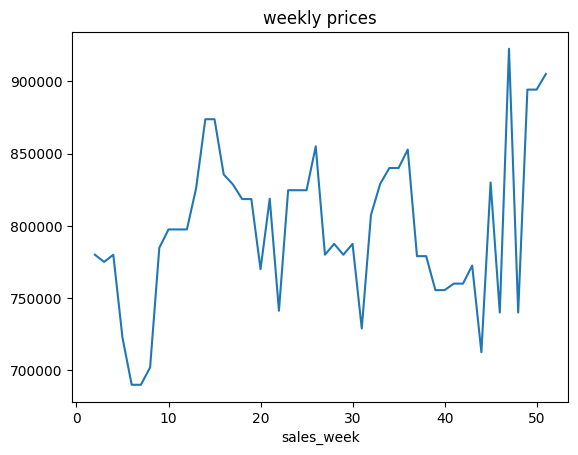

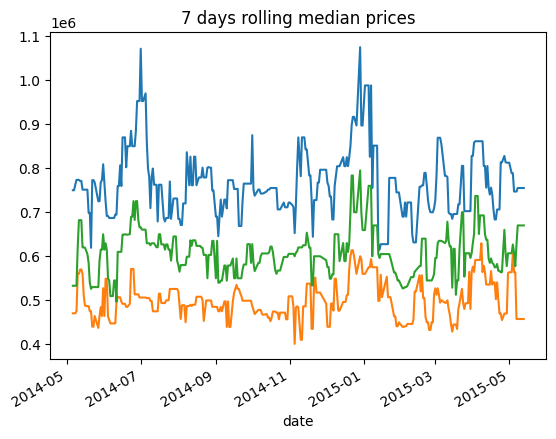

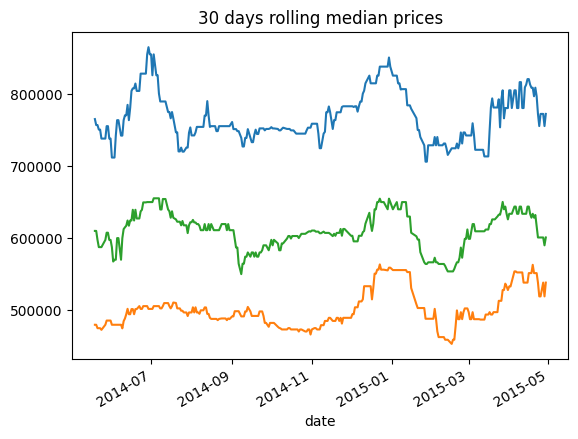

In [237]:
# plot total sales in city center

df_selling.date = pd.to_datetime(df_selling.date)
print(df_selling.sales_week.unique())
# plt.hist(df_selling.date, bins=391//7)
# plt.title('weekly sales')
# plt.show()
# plt.hist(df_selling.date, bins=391)
# plt.title('daily sales')
# plt.show()
df_group_day = df_selling.groupby(df_selling.sales_day).mean()
plt.plot(df_group_day.price)
plt.title('daily prices')
plt.show()
df_group_month = df_selling.groupby(df_selling.sales_month).mean()
plt.plot(df_group_month.price)
plt.title('monthly prices')
plt.show()
# df_group_week = df_selling.groupby(df_selling.sales_week).median()
# plt.plot(df_group_week.price)
df_group_week = df_selling.groupby(df_selling.sales_week)['price'].quantile(0.75).rolling(3, center=True).quantile(0.5)
df_group_week.plot()
plt.title('weekly prices')
plt.show()
df_group_7days = df_selling.groupby(df_selling.date).quantile(0.75).rolling(7, center=True).quantile(0.5)
df_group_7days.price.plot()
df_group_7days = df_selling.groupby(df_selling.date).quantile(0.25).rolling(7, center=True).quantile(0.5)
df_group_7days.price.plot()
df_group_7days = df_selling.groupby(df_selling.date).quantile(0.5).rolling(7, center=True).quantile(0.5)
df_group_7days.price.plot()
plt.title('7 days rolling median prices')
plt.show()
df_group_14days = df_selling.groupby(df_selling.date).quantile(0.75).rolling(30, center=True).quantile(0.5)
df_group_14days.price.plot()
df_group_14days = df_selling.groupby(df_selling.date).quantile(0.25).rolling(30, center=True).quantile(0.5)
df_group_14days.price.plot()
df_group_14days = df_selling.groupby(df_selling.date).quantile(0.5).rolling(30, center=True).quantile(0.5)
df_group_14days.price.plot()
plt.title('30 days rolling median prices')
plt.show()

/var/folders/xv/2jhhwq6s0yx_pd196qcw40980000gn/T/ipykernel_72903/4145845555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selling10.date = pd.to_datetime(df_selling10.date)


[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52  1  2  3  4  5  6  7  8  9 10 11 12 13
 14 15 16 17]


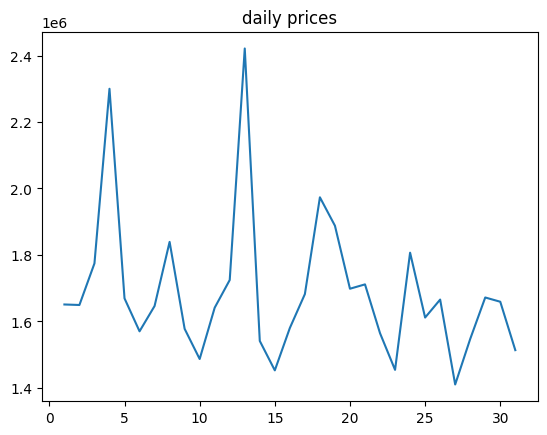

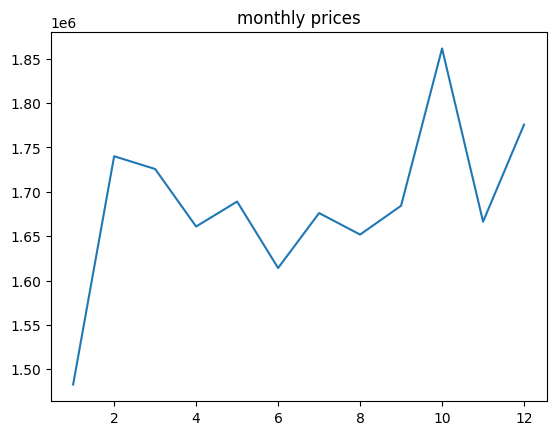

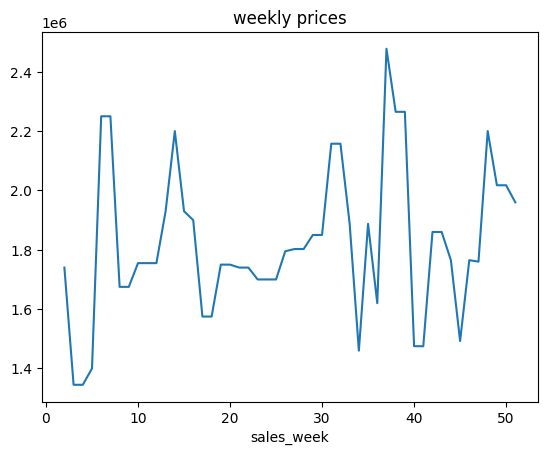

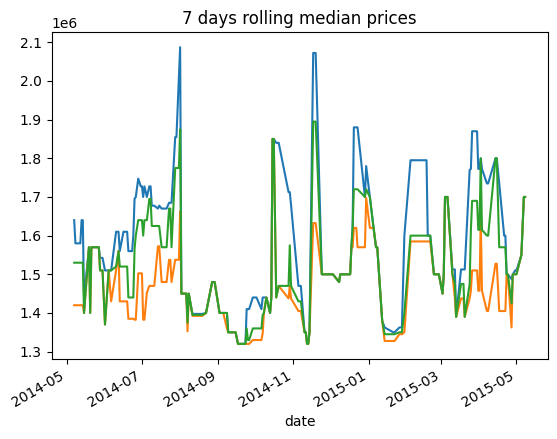

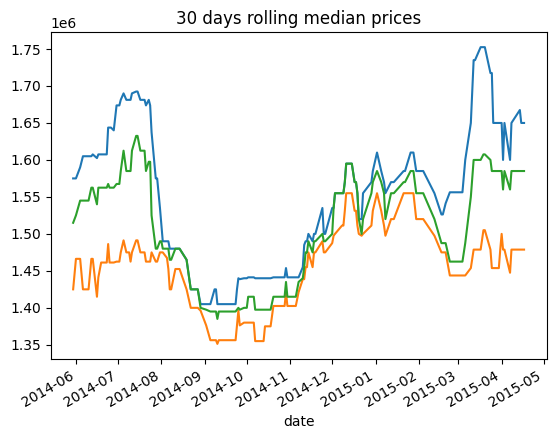

In [238]:
# plot top 10% sales in city center

df_selling10.date = pd.to_datetime(df_selling10.date)
print(df_selling10.sales_week.unique())
# plt.hist(df_selling10.date, bins=391//7)
# plt.title('weekly sales')
# plt.show()
# plt.hist(df_selling10.date, bins=391)
# plt.title('daily sales')
# plt.show()
df_group_day = df_selling10.groupby(df_selling10.sales_day).mean()
plt.plot(df_group_day.price)
plt.title('daily prices')
plt.show()
df_group_month = df_selling10.groupby(df_selling10.sales_month).mean()
plt.plot(df_group_month.price)
plt.title('monthly prices')
plt.show()
# df_group_week = df_selling10.groupby(df_selling10.sales_week).median()
# plt.plot(df_group_week.price)
df_group_week = df_selling10.groupby(df_selling10.sales_week)['price'].quantile(0.75).rolling(3, center=True).quantile(0.5)
df_group_week.plot()
plt.title('weekly prices')
plt.show()
df_group_7days = df_selling10.groupby(df_selling10.date).quantile(0.75).rolling(7, center=True).quantile(0.5)
df_group_7days.price.plot()
df_group_7days = df_selling10.groupby(df_selling10.date).quantile(0.25).rolling(7, center=True).quantile(0.5)
df_group_7days.price.plot()
df_group_7days = df_selling10.groupby(df_selling10.date).quantile(0.5).rolling(7, center=True).quantile(0.5)
df_group_7days.price.plot()
plt.title('7 days rolling median prices')
plt.show()
df_group_14days = df_selling10.groupby(df_selling10.date).quantile(0.75).rolling(30, center=True).quantile(0.5)
df_group_14days.price.plot()
df_group_14days = df_selling10.groupby(df_selling10.date).quantile(0.25).rolling(30, center=True).quantile(0.5)
df_group_14days.price.plot()
df_group_14days = df_selling10.groupby(df_selling10.date).quantile(0.5).rolling(30, center=True).quantile(0.5)
df_group_14days.price.plot()
plt.title('30 days rolling median prices')
plt.show()

/var/folders/xv/2jhhwq6s0yx_pd196qcw40980000gn/T/ipykernel_72903/3144023109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_buying.date = pd.to_datetime(df_buying.date)


[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52  1  2  3  4  5  6  7  8  9 10 11 12 13
 14 15 16 17]


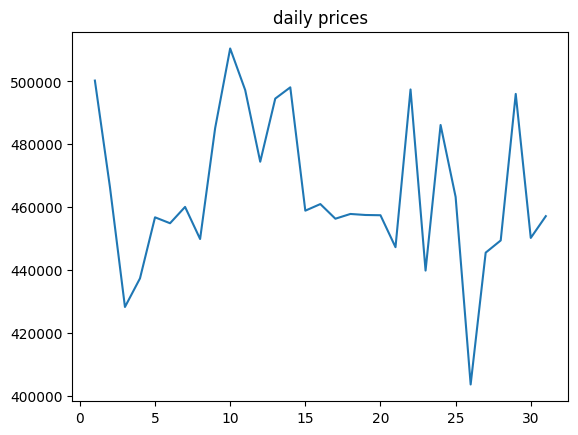

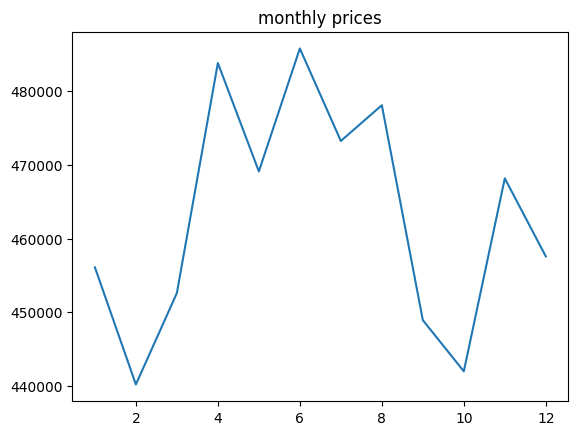

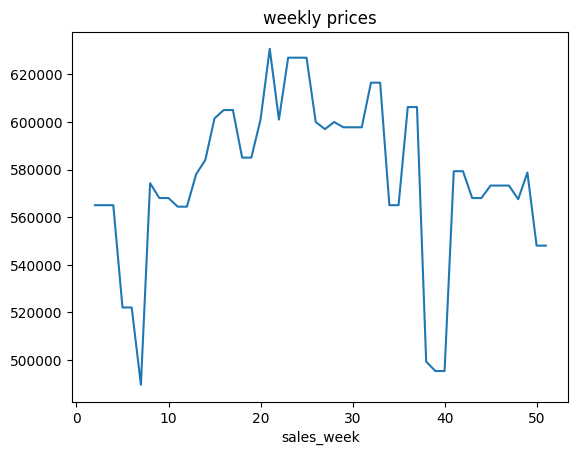

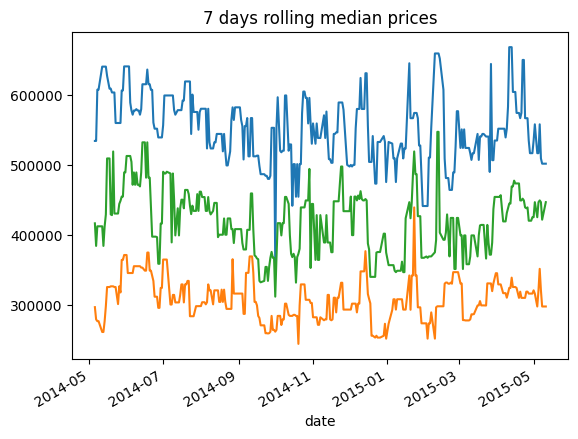

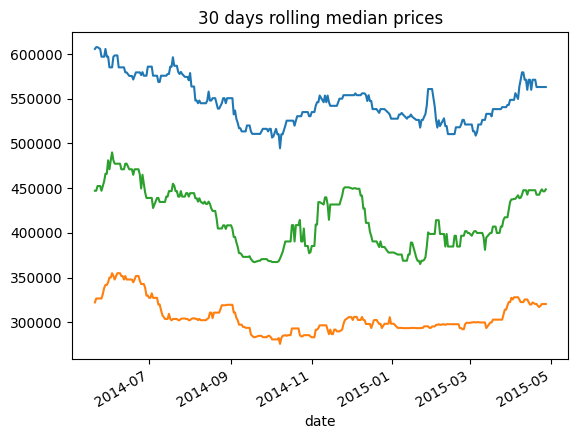

In [239]:
# plot total sales in suitable neighborhoods

df_buying.date = pd.to_datetime(df_buying.date)
print(df_buying.sales_week.unique())
# plt.hist(df_buying.date, bins=391//7)
# plt.title('weekly sales')
# plt.show()
# plt.hist(df_buying.date, bins=391)
# plt.title('daily sales')
# plt.show()
df_group_day = df_buying.groupby(df_buying.sales_day).mean()
plt.plot(df_group_day.price)
plt.title('daily prices')
plt.show()
df_group_month = df_buying.groupby(df_buying.sales_month).mean()
plt.plot(df_group_month.price)
plt.title('monthly prices')
plt.show()
# df_group_week = df_buying.groupby(df_buying.sales_week).median()
# plt.plot(df_group_week.price)
df_group_week = df_buying.groupby(df_buying.sales_week)['price'].quantile(0.75).rolling(3, center=True).quantile(0.5)
df_group_week.plot()
plt.title('weekly prices')
plt.show()
df_group_7days = df_buying.groupby(df_buying.date).quantile(0.75).rolling(7, center=True).quantile(0.5)
df_group_7days.price.plot()
df_group_7days = df_buying.groupby(df_buying.date).quantile(0.25).rolling(7, center=True).quantile(0.5)
df_group_7days.price.plot()
df_group_7days = df_buying.groupby(df_buying.date).quantile(0.5).rolling(7, center=True).quantile(0.5)
df_group_7days.price.plot()
plt.title('7 days rolling median prices')
plt.show()
df_group_14days = df_buying.groupby(df_buying.date).quantile(0.75).rolling(30, center=True).quantile(0.5)
df_group_14days.price.plot()
df_group_14days = df_buying.groupby(df_buying.date).quantile(0.25).rolling(30, center=True).quantile(0.5)
df_group_14days.price.plot()
df_group_14days = df_buying.groupby(df_buying.date).quantile(0.5).rolling(30, center=True).quantile(0.5)
df_group_14days.price.plot()
plt.title('30 days rolling median prices')
plt.show()

[20 21 22 23 24 26 27 28 29 31 32 33 35 36 37 38 40 41 42 43 44 45 49 50
 51  1  2  7  9 10 11 13 15 16 17 18 19]


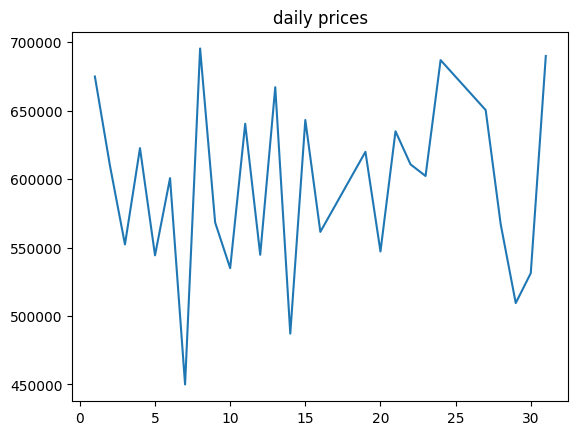

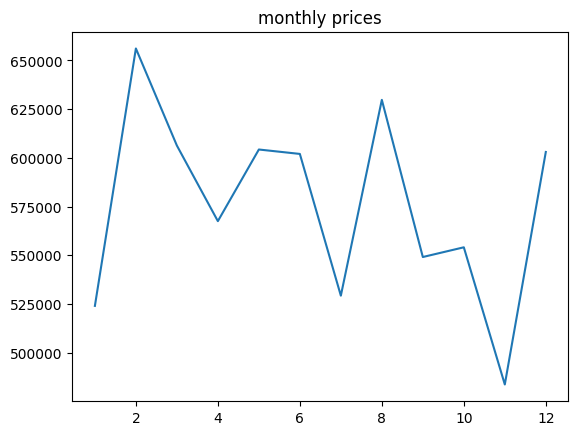

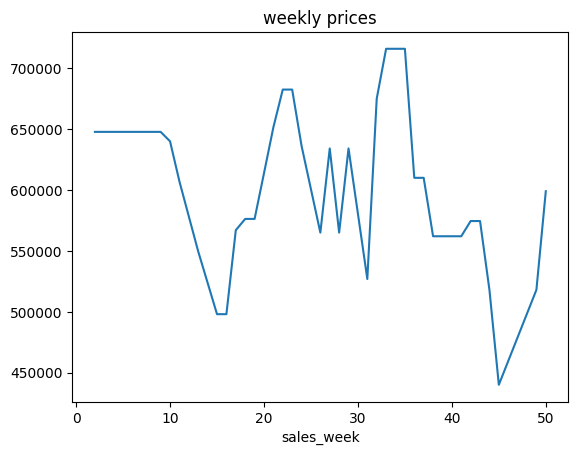

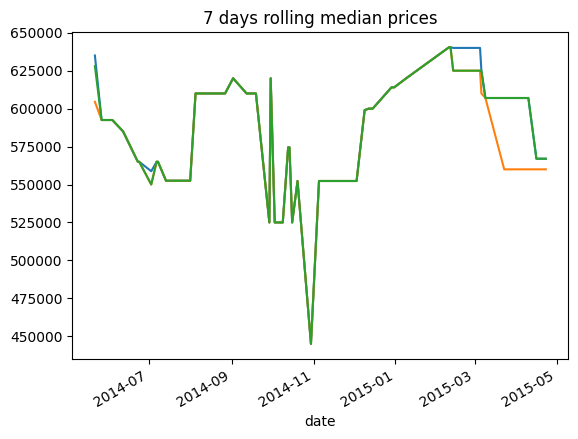

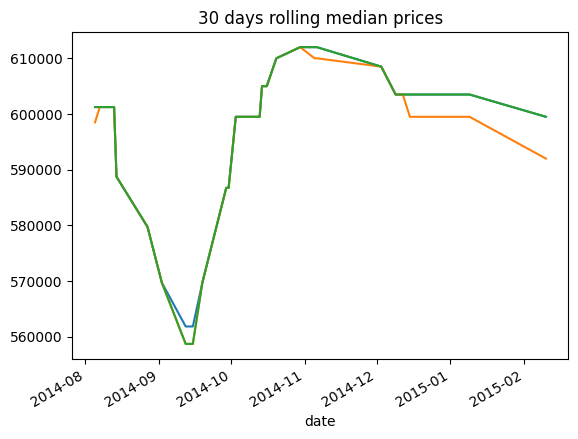

In [240]:
# plot total sales in suitable neighborhoods

df_buying_avg.date = pd.to_datetime(df_buying_avg.date)
print(df_buying_avg.sales_week.unique())
# plt.hist(df_buying_avg.date, bins=391//7)
# plt.title('weekly sales')
# plt.show()
# plt.hist(df_buying_avg.date, bins=391)
# plt.title('daily sales')
# plt.show()
df_group_day = df_buying_avg.groupby(df_buying_avg.sales_day).mean()
plt.plot(df_group_day.price)
plt.title('daily prices')
plt.show()
df_group_month = df_buying_avg.groupby(df_buying_avg.sales_month).mean()
plt.plot(df_group_month.price)
plt.title('monthly prices')
plt.show()
# df_group_week = df_buying_avg.groupby(df_buying_avg.sales_week).median()
# plt.plot(df_group_week.price)
df_group_week = df_buying_avg.groupby(df_buying_avg.sales_week)['price'].quantile(0.75).rolling(3, center=True).quantile(0.5)
df_group_week.plot()
plt.title('weekly prices')
plt.show()
df_group_7days = df_buying_avg.groupby(df_buying_avg.date).quantile(0.75).rolling(7, center=True).quantile(0.5)
df_group_7days.price.plot()
df_group_7days = df_buying_avg.groupby(df_buying_avg.date).quantile(0.25).rolling(7, center=True).quantile(0.5)
df_group_7days.price.plot()
df_group_7days = df_buying_avg.groupby(df_buying_avg.date).quantile(0.5).rolling(7, center=True).quantile(0.5)
df_group_7days.price.plot()
plt.title('7 days rolling median prices')
plt.show()
df_group_14days = df_buying_avg.groupby(df_buying_avg.date).quantile(0.75).rolling(30, center=True).quantile(0.5)
df_group_14days.price.plot()
df_group_14days = df_buying_avg.groupby(df_buying_avg.date).quantile(0.25).rolling(30, center=True).quantile(0.5)
df_group_14days.price.plot()
df_group_14days = df_buying_avg.groupby(df_buying_avg.date).quantile(0.5).rolling(30, center=True).quantile(0.5)
df_group_14days.price.plot()
plt.title('30 days rolling median prices')
plt.show()

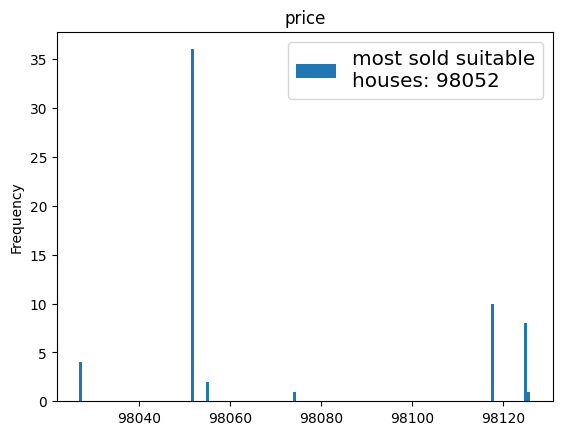

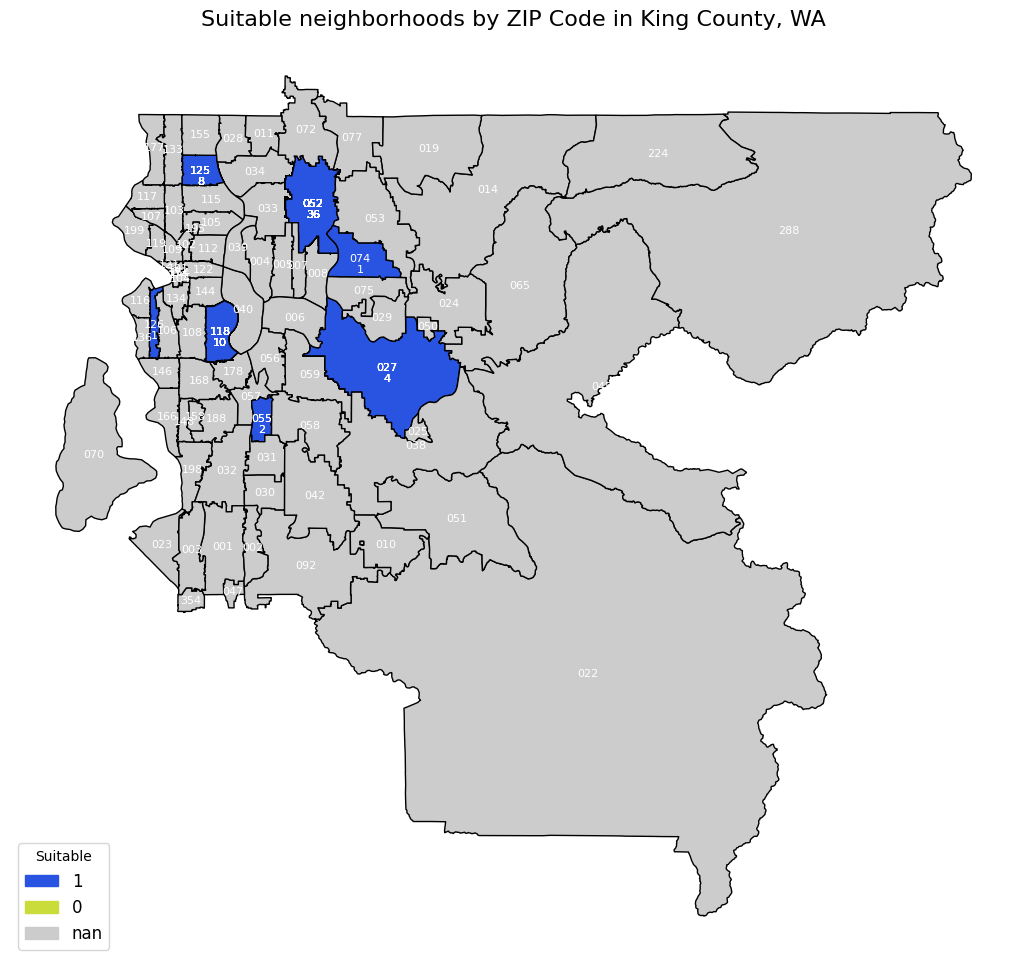

In [241]:
# check histogram of remaining zipcodes
zip_count = df_buying_avg.groupby('zipcode')['zipcode'].count()
zip_max_idx = zip_count[zip_count == zip_count.max()].index.values[0]
zip_count.index = zip_count.index.map(lambda x: str(x)[-3:])
df_buying_avg['zipcode'].plot(kind='hist', title=i, bins=150,
                            label=f'most sold suitable\nhouses: {zip_max_idx}')
plt.legend(fontsize='x-large')
plt.show()

# prepare dataframe for plotting remaining zip codes

# list all zip codes of WA
all_zip = [98052,98105,98092,98115,98023,98103,98003,98042,98034,98133,98118,
    98125,98031,98058,98122,98032,98059,98033,98004,98006,98001,98117,98030,
    98056,98155,98198,98168,98002,98038,98109,98040,98029,98027,98074,98146,
    98144,98007,98072,98011,98188,98008,98107,98106,98178,98116,98075,98108,
    98112,98028,98119,98055,98053,98126,98199,98177,98022,98102,98166,98005,
    98121,98136,98045,98101,98104,98077,98057,98065,98019,98070,98148,98014,
    98354,98051,98010,98024,98047,98151,98134,98039,98158,98195,98288,
    98174,98054,98132,98171,98184,98224,98164,98181,98009,98013,98015,98025,
    98035,98041,98050,98062,98064,98063,98071,98073,98083,98089,98093,98111,
    98113,98114,98124,98127,98131,98129,98139,98138,98141,98145,98154,98160,
    98161,98165,98170,98175,98185,98190,98194,9819]

# Load ZIP code boundaries for King County
shapefile_path = './data/zip_codes_wa/zip_codes_wa.shp'   # path to map file

zip_shapes = gpd.read_file(shapefile_path)
zip_shapes = zip_shapes[zip_shapes['ZCTA5CE20'].astype(int).isin(all_zip)]
zip_shapes = zip_shapes.rename(columns={'ZCTA5CE20': 'zipcode'})
zip_shapes['zipcode'] = zip_shapes['zipcode'].astype(int)
zip_shapes['zip3'] = zip_shapes['zipcode'].astype(str)
zip_shapes['zip3'] = zip_shapes['zip3'].apply(lambda x: x[-3:])

# swap lat and lon
cols = list(zip_shapes.columns)
a, b = cols.index('INTPTLAT20'), cols.index('INTPTLON20')
cols[b], cols[a] = cols[a], cols[b]
zip_shapes = zip_shapes[cols]

# Merge category data with geospatial data
merged = zip_shapes.merge(df_buying_avg, on='zipcode', how='left')
# plot suitable neighborhoods
# area: 2 & 3
# accessibility: 1 & 2
# surveillance: 3 & 4

merged['suitable'] = 1
# merged.loc[merged['geo_area'] == 1, 'suitable'] = 0
# merged.loc[merged['geo_area'] == 4, 'suitable'] = 0
# merged.loc[merged['accessibility'] > 2, 'suitable'] = 0
# merged.loc[merged['surveillance'] < 3, 'suitable'] = 0
merged.loc[merged['sales_year'].isna(), 'suitable'] = np.nan

# Assign fill colors (including gray for NaN)
colors = {
    1: "#2954e1",        # blue
    0: "#c9dc3a",        # yellow
    np.nan: '#cccccc'
}

# Plot the map
fig, ax = plt.subplots(figsize=(16, 12))
merged.plot(ax=ax, cmap=None, color=merged['suitable'].map(colors),
            legend=True, edgecolor='black')

# Add the zip code suffixes as labels
for idx, row in merged.iterrows():
    if row['geometry'].is_empty:
        continue
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['zip3'],
            fontsize=8, ha='center', va='center', color='white')
    if row['zip3'] in zip_count.index:
        ax.text(centroid.x, centroid.y-0.012,
                zip_count[zip_count.index == row['zip3']].values[0],
                fontsize=8, ha='center', va='center', color='white')
    
plt.title('Suitable neighborhoods by ZIP Code in King County, WA', fontsize=16)
plt.axis('off')

# Add custom legend
legend_handles = [mpatches.Patch(color=color, label=label) for label,
                  color in colors.items()]
ax.legend(handles=legend_handles, title='Suitable', loc='lower left', fontsize='large')
plt.show()

df_suitable = merged.zipcode[merged.suitable == 1]
df_suitable
df_suitable.to_csv('data/suitable.csv',index=False)